In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#filename = 'Reviews.csv'
#nlinesfile = 2000000
#nlinesrandomsample = 100000
#lines2skip = np.random.choice(np.arange(1,nlinesfile+1), (nlinesfile-nlinesrandomsample), replace=False)
#df = pd.read_csv(filename, skiprows=lines2skip)

In [5]:
df = df.drop(['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      568454 non-null  int64 
 1   Score   568454 non-null  int64 
 2   Text    568454 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.0+ MB


In [7]:
df.drop_duplicates(inplace = True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      568454 non-null  int64 
 1   Score   568454 non-null  int64 
 2   Text    568454 non-null  object
dtypes: int64(2), object(1)
memory usage: 17.3+ MB


In [9]:
df = df.reset_index(drop=True)


In [10]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [11]:
#Changing the Score into 2 values
df['Score'] = df['Score'].apply(lambda x:0 if x < 3 else 1 )
df["Score"].value_counts()
# 24281
# 4129

1    486417
0     82037
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='count'>

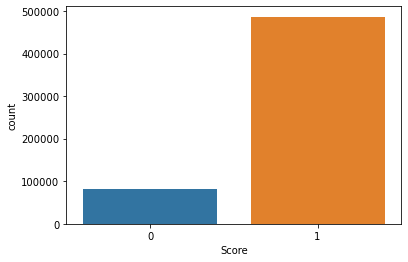

In [12]:
sns.countplot(x = "Score", data = df)

In [13]:
NEG_N = df.Score.value_counts()[0]
df_pos = df[df['Score'] == 1]['Text'].sample(NEG_N, replace=False)
df= pd.concat([df.iloc[df_pos.index], df[df.Score == 0]])

<AxesSubplot:xlabel='Score', ylabel='count'>

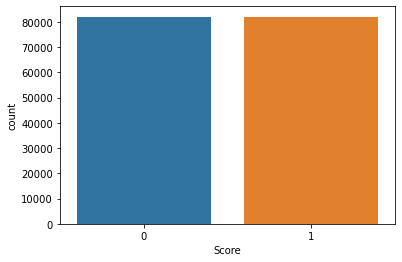

In [14]:
sns.countplot(x = "Score" , data = df)

In [15]:
df.Score.value_counts()

1    82037
0    82037
Name: Score, dtype: int64

In [16]:
import string
# making the text in the lower case
df.Text = df.Text.str.lower()
df['Text'] = df['Text'].replace(r'\d{3}.\d{3}.\d{4}','', regex=True)
df['Text'] = df['Text'].replace(r'[0-9]','', regex=True)

df['Text'] = df['Text'].replace(r'<br />','', regex=True)
#df['Text'] = df['Text'].replace(r'<a\s?[\w\:\"\//\\\/\=\(\)]+</a>','', regex=True)
def remove_punctiuation(row) :
    return row.translate(str.maketrans('', '', string.punctuation))

df["Text"] = df["Text"].apply(remove_punctiuation)

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# Removing emojis

#This code snippet encodes all the data into ASCII (American Standard Code for Information Interchange)
#values and ignore if the data can not be encoded.
#After encoding it tries to decode them all again because all the emojis were ignored in the encoding process
#So now we have all the data without emojis


df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df.head()

,Id,Score,Text
173717,173718,1,great alternative to the other chemicalladen g...
540511,540512,1,another one of my favorite k cups a good full ...
19981,19982,1,i like these chips even though they are a litt...
443007,443008,1,i usually order the organic nature select appl...
533652,533653,1,i havent been to australia but i have heard of...


In [19]:
stop_words =  set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
# Find the stop words that have "not" so the can't affect on the modeling 
import re
p = re.compile(r'\w*n\'t')
match = p.findall(str(stop_words))
match.append("can't")
match.append("n't")
match.append("not")
match

["didn't",
 "hadn't",
 "mightn't",
 "don't",
 "couldn't",
 "needn't",
 "haven't",
 "won't",
 "shan't",
 "wouldn't",
 "shouldn't",
 "doesn't",
 "aren't",
 "hasn't",
 "isn't",
 "weren't",
 "mustn't",
 "wasn't",
 "can't",
 "n't",
 'not']

In [21]:
stop_words = stop_words.difference(match)
len(stop_words)

160

In [22]:
# Tokenization and Lemmatization
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [25]:
df['text_lemma'] = df.Text.apply(lemmatize_text)
df.head()

,Id,Score,Text,text_lemma
173717,173718,1,great alternative to the other chemicalladen g...,"[great, alternative, to, the, other, chemicall..."
540511,540512,1,another one of my favorite k cups a good full ...,"[another, one, of, my, favorite, k, cup, a, go..."
19981,19982,1,i like these chips even though they are a litt...,"[i, like, these, chip, even, though, they, are..."
443007,443008,1,i usually order the organic nature select appl...,"[i, usually, order, the, organic, nature, sele..."
533652,533653,1,i havent been to australia but i have heard of...,"[i, havent, been, to, australia, but, i, have,..."


In [27]:
# Removing Stop Words
def remove(row):
    return [w for w in row if not w in stop_words]

df["meaningful_words"] = df.text_lemma.apply(remove)

In [28]:
df.head()

,Id,Score,Text,text_lemma,meaningful_words
173717,173718,1,great alternative to the other chemicalladen g...,"[great, alternative, to, the, other, chemicall...","[great, alternative, chemicalladen, gum, marke..."
540511,540512,1,another one of my favorite k cups a good full ...,"[another, one, of, my, favorite, k, cup, a, go...","[another, one, favorite, k, cup, good, full, b..."
19981,19982,1,i like these chips even though they are a litt...,"[i, like, these, chip, even, though, they, are...","[like, chip, even, though, little, different, ..."
443007,443008,1,i usually order the organic nature select appl...,"[i, usually, order, the, organic, nature, sele...","[usually, order, organic, nature, select, appl..."
533652,533653,1,i havent been to australia but i have heard of...,"[i, havent, been, to, australia, but, i, have,...","[havent, australia, heard, youtuber, itsjudyti..."


In [29]:
# For Example
# Before Removing Stop Words
df.iloc[0]["text_lemma"]

['great',
 'alternative',
 'to',
 'the',
 'other',
 'chemicalladen',
 'gum',
 'on',
 'the',
 'market',
 'but',
 'this',
 'item',
 'loses',
 'flavor',
 'and',
 'get',
 'hard',
 'to',
 'chew',
 'within',
 'minute']

In [30]:
# After Removing Stop Words
df.iloc[0]["meaningful_words"]

['great',
 'alternative',
 'chemicalladen',
 'gum',
 'market',
 'item',
 'loses',
 'flavor',
 'get',
 'hard',
 'chew',
 'within',
 'minute']

In [31]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [32]:
df.meaningful_words = df.meaningful_words.apply(listToString)

In [33]:
df.iloc[1]["meaningful_words"]

'another one favorite k cup good full bodied cup coffee without bitter taste'

In [35]:
df = df.drop(["Id","Text","text_lemma"],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164074 entries, 173717 to 568450
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Score             164074 non-null  object
 1   meaningful_words  164074 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [37]:
df.head()

,Score,meaningful_words
173717,1,great alternative chemicalladen gum market ite...
540511,1,another one favorite k cup good full bodied cu...
19981,1,like chip even though little different chip us...
443007,1,usually order organic nature select applesauce...
533652,1,havent australia heard youtuber itsjudytime re...


In [38]:
# imports used
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# split data random state 0 and test_size 0.25 default as you did not give the test_size

X_train, X_test, y_train, y_test = train_test_split(df['meaningful_words'], df['Score'], random_state = 0)

# you initiated your transformer to `fit_transform` X_train, and `transform` X_test

tfidf = TfidfVectorizer()


X_train_counts = tfidf.fit_transform(X_train)
X_test_counts = tfidf.transform(X_test)








In [39]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_counts, y_train)
y_pred = clf.predict(X_test_counts)


In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[16647,  4090],
       [ 4124, 16158]], dtype=int64)

In [41]:
>>> from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 79.98%


In [42]:
from sklearn import metrics

#print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     20737
           1       0.80      0.80      0.80     20282

    accuracy                           0.80     41019
   macro avg       0.80      0.80      0.80     41019
weighted avg       0.80      0.80      0.80     41019



In [43]:
X_train_counts.shape


(123055, 120621)

In [44]:
X_test_counts.shape

(41019, 120621)